# Camera Calibration / Distortion / Perspective Transform

In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Load camera matrix and distortion coefficients
dist_pickle = pickle.load(open('wide_dist_pickle.p', 'rb'))
mtx = dist_pickle['mtx']
dist = dist_pickle['dist']
print(mtx)
print()
print(dist)

[[560.33148363   0.         651.26264911]
 [  0.         561.3767079  499.06540191]
 [  0.           0.           1.        ]]

[[-2.32949182e-01  6.17242707e-02 -1.80423444e-05  3.39635746e-05
  -7.54961807e-03]]


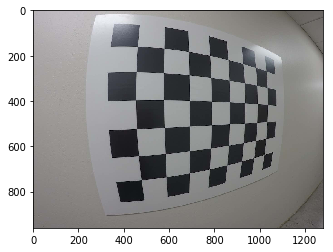

In [3]:
# Read in image
img = mpimg.imread('test_image2.png')
nx = 8      # number of inside corners in x
ny = 6      # number of inside corners in y
plt.imshow(img)
plt.show()

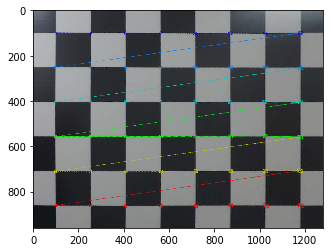

In [4]:
def corners_unwarp(img, nx, ny, mtx, dist):
    # Step 1: Undistort using mtx and dist
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    # Step 2: Convert to gray scale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    gray = (gray*255).astype(np.uint8)
    
    # Step 3: Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    chess_corner = cv2.drawChessboardCorners(undist, (nx,ny), corners, ret)
    
    # Step 4: if corners found, perspective transform
    if ret:
        # for src, choose the most outer 4 corners points
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])
        dest = np.float32([[offset, offset], 
                         [img_size[0]-offset, offset], 
                         [img_size[0]-offset, img_size[1]-offset], 
                         [offset, img_size[1]-offset]])
        
        M = cv2.getPerspectiveTransform(src, dest)      # transform matrix
        warped = cv2.warpPerspective(chess_corner, M, img_size, flags=cv2.INTER_LINEAR)
        
    return warped, M

warped, M = corners_unwarp(img, nx, ny, mtx, dist)
plt.imshow(warped, cmap='gray')
plt.show()